# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели, введение в конкурсную задачу


###### <hr\>
**Общая информация**

**Срок сдачи:** 17 апреля 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 17 апреля, -4 балла после 06:00 24 апреля, -6 баллов после 06:00 1 мая

Имеется ввиду именно сдача данного ДЗ, а не конечного результата по конкурсу (см ниже).<br\>
Жесткий дедлайн по конкурсной задаче - 14 мая 23:59 GMT.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Определям, что вам досталось

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

Укажите свою фамилию на русском языке в поле ниже.

In [2]:
USER_NAME = u"Санников".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L2 регуляризацией с помощью метода Mini Batch Stochastic Gradient Descent (SGD)


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Считать градиент по мини батчам
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

In [3]:
a = np.array([[1,2],[1,2]])
b = np.array([0,2])
b*a

array([[0, 4],
       [0, 4]])

## Имплементация (6 баллов)

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10, batch_size=10, reg_coef=0.5):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.reg_coef = reg_coef
    
    def fit(self, X, y=None):
        '''
        Обучение модели
         Эпоха
        1. Случайная перестановка
        2. Проход по батчам.
        '''
        
        self.theta = np.random.random(len(X[0]) + 1)
        z = np.ones(len(X))
        
        X_ = np.concatenate((X, np.reshape(z,(len(z),1)) ),axis=1)
        """      
        transposition = range(len(X_))
        np.random.shuffle(transposition)

        batch = X[transposition[0:self.batch_size]]
        batch_ = X_[transposition[0:self.batch_size]]
        y_b = y[transposition[0:self.batch_size]]
        
        f_batch = self.predict_proba(batch)[:,1]
        gradient =  np.reshape((y_b - f_batch), (len(y_b),1))*batch_
        
        print (1.0 - self.reg_coef/1)*self.theta +\
        self.alpha *(1.0/1)*np.sum(gradient, axis=0)

        """
        
        self.learning_quality = []
        
        current_epoch = 1
        while(current_epoch < self.max_epoch + 1):
            
            transposition = range(len(X_))
            np.random.shuffle(transposition)
            
            for i in xrange(0, len(transposition), self.batch_size):
                
                if i+self.batch_size < len(transposition):
                    batch = X[transposition[i:i+self.batch_size]]
                    batch_ = X_[transposition[i:i+self.batch_size]]
                    y_b = y[transposition[i:i+self.batch_size]]
                else:
                    batch = X[transposition[i:]]
                    batch_ = X_[transposition[i:]]
                    y_b = y[transposition[i:]]
                
                f_batch = self.predict_proba(batch)[:,1]
                gradient =  np.reshape((y_b - f_batch), (len(y_b),1))*batch_
                
                self.theta = (1.0 - self.reg_coef/current_epoch)*self.theta + \
                             self.alpha *(1.0/current_epoch)*np.sum(gradient, axis=0)
            
            
            f_X = self.predict_proba(X)
            class_zero_loss = np.dot(y, np.log(f_X[:,1]))
            class_one_loss = np.dot(z-y, np.log(f_X[:,0]))
            #class_zero = np.reshape(y,(len(y),1))*np.log(f_X[:,1])
            #class_one = np.reshape(z-y,(len(y),1))*np.log(f_X[:,0])
            #ep_quality_matrix = class_zero + class_one
            #ep_quality = np.sum(np.reshape(y,(len(y),1))*np.log(f_X[:,1]) + \
            #                    np.reshape(z-y,(len(y),1))*np.log(f_X[:,0]))
            self.learning_quality.append(class_zero_loss + class_one_loss)
            
            #del class_zero, class_one, ep_quality_matrix
            
            current_epoch += 1
        
        return self
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
        #Всё ок) 
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        
        y_hat = self.predict_proba(X)
        
        y_hat = np.argmax(y_hat, axis=1)
        
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        
        z = np.ones(len(X))
        X_ = np.concatenate((X,np.reshape(z,(len(z),1))),axis=1)
        
        y_hat_proba = self.theta*X_
        y_hat_proba = np.sum(y_hat_proba, axis=1)
        f = lambda x: (1.0)/(1 + np.exp(-x))
        y_hat_proba = f(y_hat_proba)
        y_hat_proba = np.concatenate((np.reshape(z - y_hat_proba, (len(y_hat_proba),1)), 
                                      np.reshape(y_hat_proba, (len(y_hat_proba),1))),axis=1)
        return y_hat_proba
    
    def learning_convergence(self):
        return np.array(self.learning_quality)

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

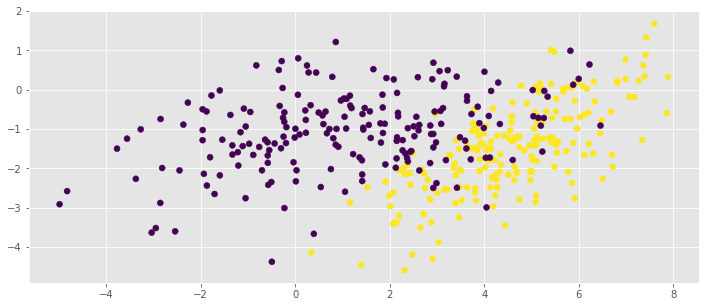

In [5]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [6]:
model = MySGDClassifier(C=1, alpha=3, batch_size=10, max_epoch=100, reg_coef=0.9)
model.fit(X, y)

/home/artyoms/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: divide by zero encountered in log


MySGDClassifier(C=1, alpha=3, batch_size=10, max_epoch=100, reg_coef=0.9)

In [7]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [8]:
print model.theta

[ 0.45449192 -0.28518561 -2.01264616]


In [9]:
x_ = [0]
y_ = []
y_.append((x_[0]*model.theta[0] + model.theta[2])/(-1*model.theta[1]))
x_.append(6)
y_.append((x_[1]*model.theta[0] + model.theta[2])/(-1*model.theta[1]))
print x_,y_

[0, 6] [-7.0573202924170948, 2.5047034127797607]


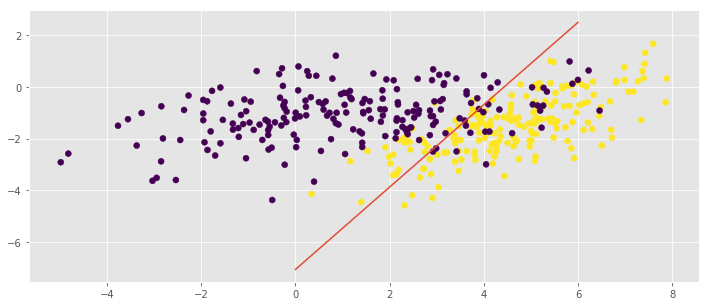

In [10]:
plt.plot(x_, y_)
plt.scatter(X[:,0], X[:,1], c=y)

plt.show()

## Анализ сходимости (2 балл)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

In [11]:
losses = -1.0*model.learning_convergence()

nan появляется по той причине, что метрика подразумевает логарифмирование чисел близких к нулю, их совсем немного в самом начале, поэтому они не помешают в анализе сходимости.

In [12]:
losses = losses[~np.isnan(losses)]
print losses

[ 4851.21677542  2175.13867519   393.77919325  4296.0397736    868.86614841
   668.70950554   257.25203761   619.80266512  1508.28585093   339.26563269
  1130.72287054   149.88393442  1397.06991255   149.97326112   928.11351692
   273.47210797   573.1625872    336.20701128   194.91036637   313.38261786
   394.53436951   476.38154792   182.15541918   252.10982231   606.91400446
   150.69863271   169.72315046   240.08896383   337.10964713   216.75018162
   150.20111585   192.84099853   161.08187467  1357.08744858   153.22024279
   178.04146562   166.59168061   171.42653949   169.80031289   337.19003525
   295.63072367   205.86695181   155.35517488   161.57165466   318.23004483
   180.79000256   194.31076656   161.65691747   170.39293082   293.58398346
   154.27010579   154.07542256   156.5707973    192.98733804   190.82989397
   156.49034205   160.91091552   160.1669618    161.67353028   192.25736721
   177.57893689   199.12516475   178.68023989   190.73308592   229.4779643
   179.539034

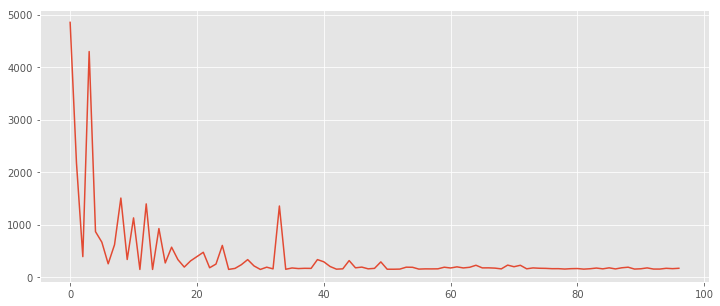

In [13]:
epoch_counter = range(len(losses))
plt.plot(epoch_counter, losses)

/home/artyoms/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: divide by zero encountered in log


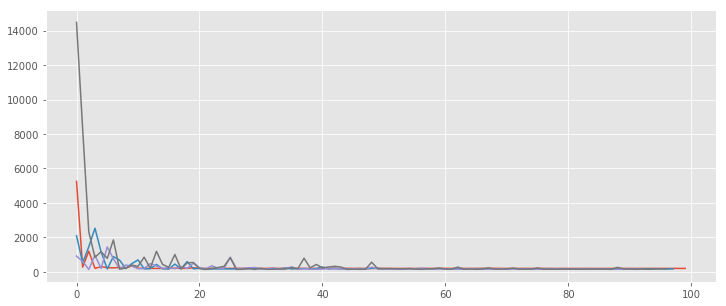

In [14]:
for alpha in np.arange(0.5 ,4.5, 1):
    model = MySGDClassifier(C=1, alpha=alpha, batch_size=10, max_epoch=100, reg_coef=0.9)
    model.fit(X, y)
    losses = -1.0*model.learning_convergence()
    losses = losses[~np.isnan(losses)]
    epoch_counter = range(len(losses))
    plt.plot(epoch_counter, losses)
plt.show()

# Введение в конкурсную задачу

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

### Правила
* Объединяться в команды по правилам конкурса можно, но по правилам нашего курса - нельзя)
* Вы можете использовать любой алгоритм, даже неизученный в нашем курсе (если на защите сможете объяснить как он работает)
* Имейте ввиду, что вы должны отправить результаты строго до 14 мая 23:59 GMT на сайт соревнования (раздел submission). Без результата в leaderboard оценка выставлена не будет.

## Данные

Для того, чтобы получить данные необходимо зарегистрироваться на сайте соревнования. 

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


Данные поставляются в двух форматах:
* В формате json содержится полная информация по текущему состоянию раунда
* В табличном формате упрощенная аггрерированная информация по текущему состоянию раунда

В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если данные не будут помещаться вам с оперативную память, рекомендуется совершить предобработку в python, а  моделирование выполнять с помощью [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit).

In [15]:
# Загрузка данных целиком
# df_list = []
# for chunk in range(1,5):
#     filepath = './trainingData_tabular_chunk%d.csv' % chunk
#     df_list.append(pd.read_csv(filepath, sep=','))

# df_data = pd.concat(df_list)

# Загрузка одной части данных
filepath = './trainingData_tabular_chunk1.csv'
df_data = pd.read_csv(filepath, sep=',')

In [16]:
df_data.shape

(500000, 45)

In [17]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [18]:
df_data.head().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [19]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.504702

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощьб one-hot кодирования, добавьте к датасету и удалите прежние столбцы

In [20]:
## Youd Code Here
print len(df_data['player_hero_card_id'].unique()), len(df_data['opponent_hero_card_id'].unique())

9 9


In [21]:
pl_card_id = pd.get_dummies(df_data['player_hero_card_id'])
op_card_id = pd.get_dummies(df_data['opponent_hero_card_id'])

In [22]:
pl_card_id = pl_card_id.rename(columns = lambda x: 'player_hero_card_id_' + str(x))
op_card_id = op_card_id.rename(columns = lambda x: 'opponent_hero_card_id_' + str(x))

In [23]:
df_data = pd.concat([df_data, pl_card_id], axis=1, join_axes=[df_data.index])
df_data = pd.concat([df_data, op_card_id], axis=1, join_axes=[df_data.index])

In [24]:
del df_data['player_hero_card_id']
del df_data['opponent_hero_card_id']

In [25]:
df_data.head().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1
opponent_deck_count,11,19,22,17,12


In [26]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [27]:
Y = df_data['decision'].values

In [28]:
print(Y)

[1 1 1 ..., 1 0 0]


In [29]:
df_data = normalize(df_data)

In [30]:
df_data.head()

,decision,turn,opponent_armor,opponent_attack,opponent_hp,opponent_special_skill_used,opponent_weapon_durability,opponent_crystals_all,opponent_crystals_current,opponent_deck_count,...,player_hero_card_id_1235,opponent_hero_card_id_25,opponent_hero_card_id_326,opponent_hero_card_id_390,opponent_hero_card_id_494,opponent_hero_card_id_612,opponent_hero_card_id_754,opponent_hero_card_id_798,opponent_hero_card_id_981,opponent_hero_card_id_1235
gamestate_id,,,,,,,,,,,,,,,,,,,,,
4687346,1.0,0.448276,0.000000,0.0,0.137931,0.0,0.0,1.0,1.0,0.423077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3270826,1.0,0.206897,0.000000,0.0,0.724138,0.0,0.0,0.6,0.6,0.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3189487,1.0,0.137931,0.142857,0.0,0.965517,0.0,0.0,0.4,0.1,0.846154,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4098946,1.0,0.241379,0.000000,0.0,0.862069,0.0,0.0,0.7,0.7,0.653846,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2661127,0.0,0.413793,0.000000,0.0,1.000000,0.0,0.0,1.0,0.1,0.461538,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Обучение модели (1 балл)

#### Задание

* Получите матрицу объект признак `X` и вектор целевого признака `y`
* Обучите модуль из первой части этого ДЗ на данных

In [31]:
features = list(df_data.columns.values)
print features

['decision', 'turn', 'opponent_armor', 'opponent_attack', 'opponent_hp', 'opponent_special_skill_used', 'opponent_weapon_durability', 'opponent_crystals_all', 'opponent_crystals_current', 'opponent_deck_count', 'opponent_fatigue_damage', 'opponent_hand_count', 'opponent_played_minions_count', 'player_armor', 'player_attack', 'player_hp', 'player_special_skill_used', 'player_weapon_durability', 'player_crystals_all', 'player_crystals_current', 'player_deck_count', 'player_fatigue_damage', 'player_hand_count', 'player_played_minions_count', 'opponent_played_nOfCards', 'opponent_played_attack', 'opponent_played_crystals_cost', 'opponent_played_hp_current', 'opponent_played_hp_max', 'player_played_nOfCards', 'player_played_attack', 'player_played_crystals_cost', 'player_played_hp_current', 'player_played_hp_max', 'player_hand_nOfMinions', 'player_hand_nOfSpells', 'player_hand_nOfWeapons', 'player_hand_nOfCards', 'player_hand_nOfPlayable', 'player_hand_attack', 'player_hand_crystals_cost', 

In [32]:
del features[0]

In [33]:
X_train = df_data[features].values
print X_train

[[ 0.44827586  0.          0.         ...,  1.          0.          0.        ]
 [ 0.20689655  0.          0.         ...,  0.          0.          0.        ]
 [ 0.13793103  0.14285714  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.75862069  0.          0.         ...,  1.          0.          0.        ]
 [ 0.17241379  0.          0.         ...,  0.          0.          0.        ]
 [ 0.24137931  0.          0.14285714 ...,  0.          0.          0.        ]]


In [35]:
model = MySGDClassifier(C=1, alpha=3, batch_size=100, max_epoch=100, reg_coef=0.9)
model.fit(X_train, Y)


/home/artyoms/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:121: RuntimeWarning: overflow encountered in exp
/home/artyoms/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: divide by zero encountered in log


MySGDClassifier(C=1, alpha=3, batch_size=100, max_epoch=100, reg_coef=0.9)

## Применение модели (3 балла)
#### Задание
* Загрузите тестовые данные
* Выполните те же операции с датасетом, что и с обучающей выборкой
* Примените модель и загрузите решение на страницу конкурса
* Напечатайте ваш ник и оценку качества, полученную после загрузки

Судя по описанию, submission file должен состоять из одного столбца с числами, соответствующим вероятностям победы игрока.

In [36]:
## Youd Code Here
df_test_data = pd.read_csv('testData_tabular.csv', sep=',')

In [37]:
df_test_data.head().T

,0,1,2,3,4
gamestate_id,6845857.0,9279433.0,6642076.0,9169516.0,8991397.0
decision,NaN,NaN,NaN,NaN,NaN
turn,12.0,6.0,14.0,7.0,9.0
opponent.armor,0.0,0.0,0.0,0.0,0.0
opponent.attack,0.0,0.0,0.0,0.0,0.0
opponent.hero_card_id,798.0,326.0,390.0,798.0,326.0
opponent.hp,29.0,12.0,12.0,30.0,30.0
opponent.special_skill_used,1.0,0.0,0.0,0.0,1.0
opponent.weapon_durability,0.0,0.0,0.0,0.0,0.0
opponent.crystals_all,10.0,5.0,10.0,6.0,8.0


In [38]:
print df_test_data['player.hero_card_id'].unique(), df_test_data['opponent.hero_card_id'].unique()

[ 798  612  390  326  981  494   25  754 1235] [ 798  326  390  981   25  612  494  754 1235]


In [39]:
pl_card_id = pd.get_dummies(df_test_data['player.hero_card_id'])
op_card_id = pd.get_dummies(df_test_data['opponent.hero_card_id'])

In [40]:
pl_card_id = pl_card_id.rename(columns = lambda x: 'player.hero_card_id_' + str(x))
op_card_id = op_card_id.rename(columns = lambda x: 'opponent.hero_card_id_' + str(x))
df_test_data = pd.concat([df_test_data, pl_card_id], axis=1, join_axes=[df_test_data.index])
df_test_data = pd.concat([df_test_data, op_card_id], axis=1, join_axes=[df_test_data.index])
del df_test_data['player.hero_card_id']
del df_test_data['opponent.hero_card_id']

In [41]:
features_test = list(df_test_data.columns.values)
print features_test

['gamestate_id', 'decision', 'turn', 'opponent.armor', 'opponent.attack', 'opponent.hp', 'opponent.special_skill_used', 'opponent.weapon_durability', 'opponent.crystals_all', 'opponent.crystals_current', 'opponent.deck_count', 'opponent.fatigue_damage', 'opponent.hand_count', 'opponent.played_minions_count', 'player.armor', 'player.attack', 'player.hp', 'player.special_skill_used', 'player.weapon_durability', 'player.crystals_all', 'player.crystals_current', 'player.deck_count', 'player.fatigue_damage', 'player.hand_count', 'player.played_minions_count', 'opponent.played.nOfCards', 'opponent.played.attack', 'opponent.played.crystals_cost', 'opponent.played.hp_current', 'opponent.played.hp_max', 'player.played.nOfCards', 'player.played.attack', 'player.played.crystals_cost', 'player.played.hp_current', 'player.played.hp_max', 'player.hand.nOfMinions', 'player.hand.nOfSpells', 'player.hand.nOfWeapons', 'player.hand.nOfCards', 'player.hand.nOfPlayable', 'player.hand.attack', 'player.hand.

In [42]:
del features_test[:2]
print features_test

['turn', 'opponent.armor', 'opponent.attack', 'opponent.hp', 'opponent.special_skill_used', 'opponent.weapon_durability', 'opponent.crystals_all', 'opponent.crystals_current', 'opponent.deck_count', 'opponent.fatigue_damage', 'opponent.hand_count', 'opponent.played_minions_count', 'player.armor', 'player.attack', 'player.hp', 'player.special_skill_used', 'player.weapon_durability', 'player.crystals_all', 'player.crystals_current', 'player.deck_count', 'player.fatigue_damage', 'player.hand_count', 'player.played_minions_count', 'opponent.played.nOfCards', 'opponent.played.attack', 'opponent.played.crystals_cost', 'opponent.played.hp_current', 'opponent.played.hp_max', 'player.played.nOfCards', 'player.played.attack', 'player.played.crystals_cost', 'player.played.hp_current', 'player.played.hp_max', 'player.hand.nOfMinions', 'player.hand.nOfSpells', 'player.hand.nOfWeapons', 'player.hand.nOfCards', 'player.hand.nOfPlayable', 'player.hand.attack', 'player.hand.crystals_cost', 'player.hand

In [43]:
df_answer = pd.DataFrame(index=df_test_data.index)
df_answer['gamestate_id'] = df_test_data['gamestate_id']

In [44]:
df_test_data = normalize(df_test_data)

In [45]:
df_test_data.head

<bound method DataFrame.head of         gamestate_id  decision      turn  opponent.armor  opponent.attack  \
0           0.369171       NaN  0.733333            0.00         0.000000   
1           0.855887       NaN  0.333333            0.00         0.000000   
2           0.328415       NaN  0.866667            0.00         0.000000   
3           0.833904       NaN  0.400000            0.00         0.000000   
4           0.798280       NaN  0.533333            0.00         0.000000   
5           0.536285       NaN  0.533333            0.00         0.000000   
6           0.821056       NaN  0.466667            0.00         0.000000   
7           0.074822       NaN  0.266667            0.00         0.000000   
8           0.337144       NaN  0.266667            0.00         0.000000   
9           0.890314       NaN  0.600000            0.00         0.000000   
10          0.133578       NaN  0.200000            0.00         0.000000   
11          0.576624       NaN  0.333333    

In [46]:
X_test = df_test_data[features_test].values

In [47]:
X_train.shape

(500000, 59)

In [48]:
X_test.shape

(750000, 59)

In [49]:
Y_test = model.predict_proba(X_test)

In [50]:
print min(Y_test[:,1])

4.35499751337e-06


In [51]:
df_answer['decision'] = Y_test[:,1]

In [52]:
df_answer.to_csv('submission.csv', index=False)

Artyom Sannikov[Technosphere] H4
https://knowledgepit.fedcsis.org/mod/challenge/view.php?id=1024#